# testGcamp6fData
This notebook serve to perform some tests on the gcamp6f data extracted from the preprocessed retinal 2P Ca++ data (hdf5) by the notebook getGcamp6fData:
- soma sizes
- DSI distributions
- Quality index (QI) values

# TODO:


# Qs:

# Setup

In [17]:
# Library/module setup

# System libs
import sys # system lib
import os # directory lib

# Data libs
import h5py # HDF5 lib
import numpy as np # linear alg lib
import pandas as pd # pandas data structures lib
from pandas import HDFStore
import scipy
import scipy.io
import copy

# Plotting libs
import matplotlib.pyplot as plt # plotting lib
import seaborn as sns # nice plotting lib
from pylab import rcParams
import warnings
import matplotlib.gridspec as gridspec
from __future__ import print_function

# Misc libs
# for integration of plots into jupyter nb
%matplotlib inline

# Custom libs/mods
sys.path.append('../utils/') # Import path to utility function: norm.py, interp.py
import postProc as pop # Import PostProcessing module (functions: normalization, interpolation, QI etc.)
# from norm import norm # normalization function (ensure in same directory)
# from interp import interpNewSRate # interpolation function for resampling trace
# try:
#     import pycircstat as circ # Phil's & Alex's circular statistics lib (use pip install if not present)
# except ImportError:
#     !pip install pycircstat
# try:
#     import peakutils as pk # needed for EulerLab (Andre) classFuncs
# except ImportError:
#     !pip install peakutils

# sys.path.append('/Volumes/busse_lab/users/yannik/code/retina_analysis/') 
sys.path.append('../../../code/ret_preproc/dataProcessing/Python/postProcessing') # EulerLab (Andre) ret postproc code
import classFuncs as cf # Andres function set, import all



In [18]:
# Fig par
plt.style.use('ggplot')

In [3]:
# printOptions = np.get_printoptions()
# np.set_printoptions(threshold=np.nan) # default: 100

In [19]:
# Parameter setup
p = {}
p.update({
         # IO pars
        'loadDirRaw': "../../data/2P/raw/gcamp6/", # load directory raw gcamp6f data
        'loadDirProc': "../../data/2P/proc/", # load directory processed data
#         'saveDir': "../../data/2P/proc/", # save directory
        'fidGcamp6f': "gcamp6Data_gcamp6fKern_7.8Hz.h5", # save as HDF5 file
#         'dtype': 'Pre', # work on preprocessed data (hdf5)
        'fidOgb1Group': 'BadenEtAl_RGCs_2016_ogb1_groups.mat', # processed OGB-1 file (OGB1 groups)
        'fidOgb1Clu': 'BadenEtAl_RGCs_2016_ogb1_clus.mat', # processed OGB-1 file (OGB1 clus)
        
        # Set stimuli of interest & var names for dataframe accordingly
#         'stim': ["chirp", "bar"], # stimulus name
#         'stimFile': ["Chirps.h5", "DS.h5"], # stimulus file name (note: diff convention)        
        
        # Normalization pars
        'normMode': 'meanMax', # OPTIONS: 'meanMax', 'medMax', 'r', 'z' (more options, see postProc.py)
        
        # Quality index (QI) pars
        'chirpMinQi': 0.45, # Baden2016: 0.45 <> test: 0.2
        'barMinQi': 0.6, # Baden2016: 0.6 <> test: 0.4
    })

## Load data

In [20]:
# Load gcamp6 data
data = pd.read_hdf(p['loadDirProc']+p['fidGcamp6f'], 'data')

In [9]:
# Load gcamp6 data without QI-criterion
# with separate chirp and bar - avoids having to re-generate data every time
p.update({'fidGcamp6f': 'gcamp6Data_c+b.h5'})
chirpData = pd.read_hdf(p['loadDirProc']+p['fidGcamp6f'], 'chirpData')
barData = pd.read_hdf(p['loadDirProc']+p['fidGcamp6f'], 'barData')

# Merge chirp and bar data
data = pd.merge(chirpData, barData, how='inner')

In [21]:
data

,chirpDeconvMean,chirpDeconvSd,chirpDeconvTraces,chirpMean,chirpMed,chirpQi,chirpSd,chirpTraces,date,field,...,barDeconvSd,barDeconvTraces,barMean,barMed,barQi,barSd,barTraces,dsPVal,dsVector,dsi
0,"[0.182614715746, 0.116743502721, 0.28316401370...","[0.302011176476, 0.186499065661, 0.51234073060...","[[0.307347520304, -0.040183597133, 0.922208806...","[-0.0128713834029, -0.0701261534049, 0.0316880...","[-0.0055380478445, 0.00327161255789, 0.0046195...",0.211864,"[0.0893408663753, 0.133742229913, 0.1877135966...","[[-0.0055380478445, -0.173031743708, 0.2079987...",20160421,02,...,"[0.696818394121, 0.677580020891, 0.61536064068...","[[0.395054509992, 0.501994742287, 0.5897134846...","[0.0437493376413, 0.076314383634, -0.010803922...","[0.0338458518582, 0.0828471658089, -0.03694435...",0.617006,"[0.215549096274, 0.172742665322, 0.24770039458...","[[0.0711159668121, 0.144650490188, 0.218331346...",0.065,"[0.146971650946, 0.0876970024924, 0.7751160815...",0.452632
1,"[0.395936570383, 0.484333335227, 0.36619875319...","[0.461526717202, 0.392324339998, 0.24295881311...","[[-0.0427311664374, 0.297276886923, 0.28766548...","[-0.0783298482677, 0.0479358267538, -0.0064009...","[-0.277485269658, -0.0353581361838, 0.05130186...",0.227458,"[0.313383878213, 0.282260583339, 0.26402579560...","[[-0.428683834757, 0.27982536097, 0.5339159519...",20160421,05,...,"[0.871181988164, 0.522959265965, 0.51579111927...","[[1.82063407525, -0.820045598882, 0.6898237610...","[0.153095285772, 0.0342849111764, 0.0607478715...","[0.257528303816, 0.0728616046178, 0.0197642430...",0.690928,"[0.443284562412, 0.245261744949, 0.30380457796...","[[2.83108430035, -0.695604998779, 0.7217762740...",0.173,"[0.451481049408, 0.959507257906, 0.45828112638...",0.343493
2,"[0.122236683075, 0.0945549007402, 0.0808013954...","[0.0608752624143, 0.0557781937903, 0.037605802...","[[0.0896329891682, 0.12281087181, 0.0762538680...","[0.0283608752041, 0.0193459166529, 0.007544470...","[0.00577323761667, 0.01094808481, 0.0114910636...",0.456170,"[0.0481080506676, 0.026399595447, 0.0327665772...","[[0.00577323761667, 0.0387059296714, 0.0114910...",20160421,05,...,"[0.0648078122015, 0.0556197504553, 0.095786653...","[[0.110281662253, 0.0436820382156, -0.08849023...","[0.00445197752091, -5.25857042303e-05, 0.00086...","[0.00397682280363, -0.00676679862211, 0.004422...",0.955744,"[0.038666757822, 0.031322656201, 0.03718549274...","[[0.0207439155288, -0.00985763496433, -0.10099...",0.112,"[0.633059567245, 0.67284132968, 0.503774564465...",0.315990
3,"[0.242954470837, 0.267869409971, 0.26737713004...","[0.379771023111, 0.268041602557, 0.42118392915...","[[0.875277398854, 0.0720089240492, -0.12034829...","[-0.284194529373, -0.289431515546, -0.29011844...","[0.00378478493363, -0.113673823443, -0.2722623...",0.440871,"[0.739194895605, 0.3732969897, 0.276251460654,...","[[0.328532088453, -0.113673823443, -0.42387452...",20160421,05,...,"[0.565519659556, 0.572074846524, 0.53665315978...","[[0.739821045868, 0.273604500302, 0.7087512917...","[0.0900757673395, 0.0706533176005, 0.038358754...","[0.0459214428739, 0.0215450752582, -0.00617277...",0.717470,"[0.212845258171, 0.234778527095, 0.27119271184...","[[0.0211843686958, -0.144698295717, -0.0536886...",0.000,"[0.970396696504, 0.757905176881, 0.20632879262...",0.412893
4,"[0.511943758297, 0.30111678947, 0.421022640162...","[0.330802736146, 0.153093080913, 0.19764728626...","[[0.613555646733, 0.599308152433, 0.4597155645...","[0.16869152162, 0.0250442959601, 0.11692367081...","[0.262316657829, -0.0569183318512, 0.207522724...",0.414688,"[0.411126253043, 0.31175320296, 0.224346218133...","[[0.36056425394, 0.506663426594, 0.44693488025...",20160421,05,...,"[0.435542019473, 0.293653595158, 0.31641781605...","[[0.915940966922, 0.214739540399, 0.0909099409...","[-0.00764754449503, 0.0471765727699, 0.0098497...","[0.0131708665295, 0.108581793156, 0.0343925346...",0.784375,"[0.328159461195, 0.248482004799, 0.20523715633...","[[0.739208218301, 0.1072662

[(0, 1), (0, 200)]

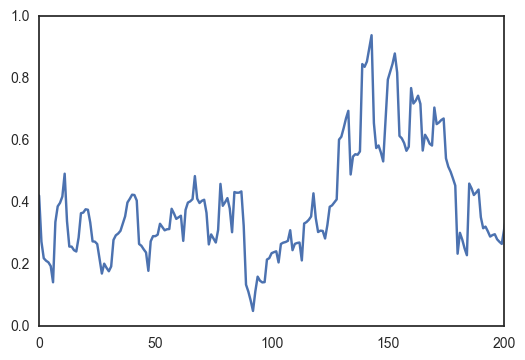

In [12]:
plt.plot(data['chirpDeconvMean'][0])
plt.gca().set(
    xlim = [0,200],
    ylim = [0,1],
)

[(0, 1), (0, 200)]

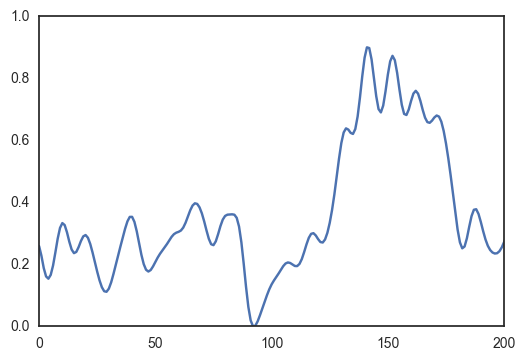

In [16]:
plt.plot(data['chirpDeconvMean'][0])
plt.gca().set(
    xlim = [0,200],
    ylim = [0,1],
)

## Check distribution of chirp and bar QI

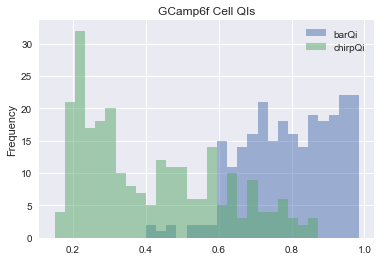

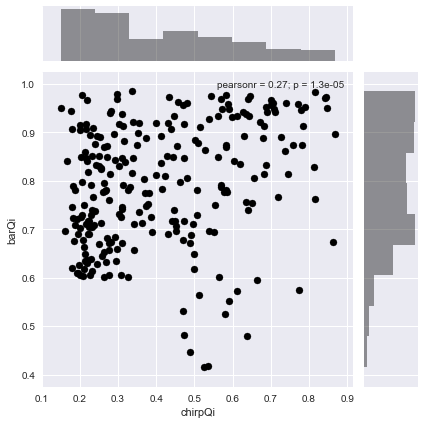

chirpQI 10th %ile: 0.205564082442
barQI 10th %ile: 0.619947829358


In [22]:
# Extract chirp- and bar-QI to make new df (clumsy)
histData = pd.DataFrame({
    'chirpQi': data.chirpQi,
    'barQi': data.barQi,
    })

# Plot histogram
histData.plot.hist(alpha=0.5, bins=30)
# histData.plot(kind='hist', alpha=0.5, bins=30)
# histData.plot(kind='kde', alpha=0.5)
plt.title('GCamp6f Cell QIs')

# Plot scatter
# data.plot(kind='scatter', x='chirpQi', y='barQi', color= 'k')

# Plot scatter hist
# Note: jointplot is fig-lvl > hard to put into gridspec, needs to be positioned after plotting - check later
sns.jointplot(x=histData['chirpQi'], y=histData['barQi'], color='k')
# sns.jointplot(data=histData, x='chirpQi', y='barQi') # alternative syntax - same result

plt.show()

# Show 10th percentile of QIs
print('chirpQI 10th %ile:', np.percentile(data['chirpQi'], 10))
print('barQI 10th %ile:', np.percentile(data['barQi'], 10))

### Alternative ways to plot chirpQi and barQi in same plot
1. try to use neat pandas plot function to extract data from gcamp6 df - FAIL
 - instead, create new df - WORKS 
2. make new df form columns and use pandas plot function - clumsy
3. use matplotlib/seaborn and call two plot commands on each df column - semiclumsy


In [ ]:
# plt.figure()
fig, ax = plt.subplots()

# data['chirpQi'].plot.hist()
# data.plot.hist(data.chirpQi)
# data.hist(column= 'chirpQi')

# Only plots as two separate plots
data.hist(column=['chirpQi', 'barQi'], bins=30, stacked=True, alpha=0.6, ax=ax)

# plt.hist(data['chirpQi'])
# sns.distplot(data['chirpQi'])
# plt.show()


## Check distribution of DS

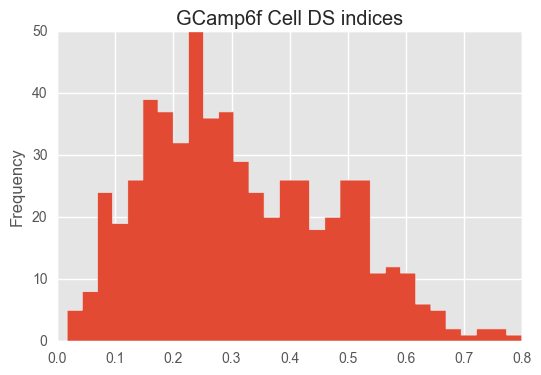

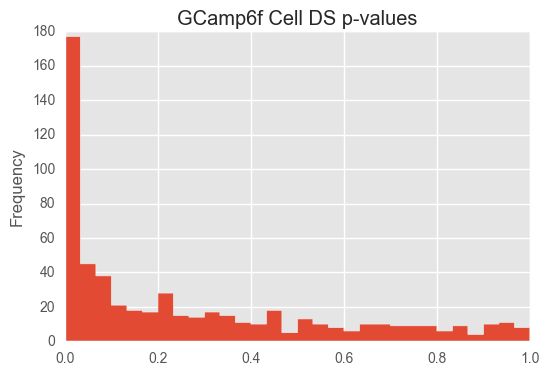

201/581 cells (34.6%) with DS p-value <= 0.05


In [161]:
data['dsi'].plot.hist(bins=30, histtype='stepfilled')
plt.title('GCamp6f Cell DS indices')
plt.show()

data['dsPVal'].plot.hist(bins=30, histtype='stepfilled')
plt.title('GCamp6f Cell DS p-values')
plt.show()

# Indicate proportion of DS-cells
print('%d/%d cells (%.1f%%) with DS p-value <= 0.05' 
      % (len(data[data.dsPVal <= 0.05]), len(data), (len(data[data.dsPVal <= 0.05])/len(data))*100))

## Check distribution of soma areas

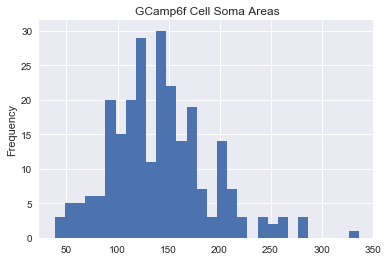

131/251 cells (52.2%) with soma size >= 136 mum^2
36/251 cells (14.3%) with soma size >= 190.1 mum^2


In [24]:
data['somaArea'].plot.hist(bins=30)
plt.title('GCamp6f Cell Soma Areas')
plt.show()

## Indicate proportion of 'large' cells
# hard limit: 136 mum
print('%d/%d cells (%.1f%%) with soma size >= 136 mum^2' 
      % (len(data[data.somaArea >= 136]), len(data), (len(data[data.somaArea >= 136])/len(data))*100))

# flexible limit: mean + 1SD
somaSizeLim = np.mean(data.somaArea) + np.std(data.somaArea)
print('%d/%d cells (%.1f%%) with soma size >= %.1f mum^2' 
      % (len(data[data.somaArea >= somaSizeLim]), len(data),
        (len(data[data.somaArea >= somaSizeLim])/len(data))*100,
        somaSizeLim))

In [36]:
data

,chirpMean,chirpMed,chirpQi,chirpSd,chirpTraces,date,field,roi,somaArea,barMean,barMed,barQi,barSd,barTraces,dsCondAvgTraces,dsPVal,dsVector,dsi
0,"[-0.0251789467735, -0.0667498203767, -0.053349...","[-0.051599430876, -0.00160525099755, -0.040697...",0.210671,"[0.106187625023, 0.112027577844, 0.04887151390...","[[-0.0370400823002, -0.241979720485, -0.080228...",20160421,02,1.0,168.383789,"[0.0320563971142, 0.0567836442226, 0.032988891...","[0.0222013935839, 0.0697948852364, -0.00686241...",0.618372,"[0.190101550588, 0.148608255282, 0.22352639216...","[[0.0110401380027, 0.0502713844971, 0.15975035...","[[0.0175124648582, -0.0175124648582, 0.0215298...",0.063,"[0.713888117795, 0.0, 0.0907293448796, 0.04013...",0.483129
1,"[-0.0858307139797, 0.0818821383053, -0.0574981...","[-0.183088911595, -0.0219507025354, -0.1277295...",0.225048,"[0.246873704154, 0.283231644395, 0.22562166002...","[[-0.318861965617, 0.0778228173261, 0.32083954...",20160421,05,3.0,41.357422,"[0.149335983861, 0.0199401313626, 0.0923107203...","[0.190341999946, -0.0362960359956, 0.016792067...",0.690661,"[0.416381738059, 0.277243562227, 0.24807382527...","[[0.960484090923, -0.261357298117, 0.037128411...","[[0.826633912611, 0.155764538962, 0.0243464642...",0.130,"[0.0994270878206, 1.0, 0.421483519164, 0.66601...",0.401369
2,"[0.0265705437324, 0.0188922425768, 0.011981031...","[0.00595474432706, 0.0094681814164, 0.01670067...",0.456067,"[0.0491766147697, 0.0196079498215, 0.030574177...","[[0.00595474432706, 0.030658091963, 0.03693895...",20160421,05,6.0,56.127930,"[0.00535131850666, 0.00159458344691, 0.0016291...","[0.00170000679227, -0.00337118033671, 0.002339...",0.963260,"[0.0377538542153, 0.028284011869, 0.0315877774...","[[0.0337802427185, 0.0117441590418, -0.0530034...","[[0.0149268294922, 0.010938192606, -0.02238278...",0.079,"[0.673303997474, 0.920562574634, 0.71800028409...",0.315405
3,"[-0.154849461326, -0.169396594483, -0.15739605...","[0.00794289540677, 7.17431891287e-05, -0.24458...",0.440655,"[0.631965419163, 0.353218229303, 0.14616334008...","[[0.553307910107, 0.101625856446, -0.244585188...",20160421,05,8.0,121.118164,"[0.0779782495527, 0.0635529475715, 0.035616070...","[0.0903559652284, 0.00954637141548, 0.01136041...",0.717904,"[0.180000408762, 0.197267809192, 0.25018212136...","[[0.0142429574205, -0.139645888269, -0.1662854...","[[0.0997371964519, 0.0312670562746, -0.1617419...",0.000,"[0.822185154739, 0.964758190985, 1.0, 0.728004...",0.423637
4,"[0.155998659047, 0.0743476266897, 0.0305981846...","[0.256052648318, -0.00380823331306, 0.01909916...",0.415044,"[0.374128967437, 0.303684715761, 0.16254776902...","[[0.256052648318, 0.467656946218, 0.3201803913...",20160421,05,9.0,138.842773,"[-0.0102517374625, 0.0317799935902, 0.02627439...","[-0.00674042825371, 0.0747787474635, 0.0500609...",0.782924,"[0.282496669431, 0.216960841966, 0.17493897464...","[[0.577047225915, 0.144609963948, -0.240251361...","[[0.281862677292, 0.148183880407, -0.023529807...",0.003,"[0.899555573637, 1.0, 0.922426591903, 0.874171...",0.475967
5,"[-0.0907266761446, 0.00670551824556, 0.1693085...","[-0.131356417419, 0.00526068373306, 0.15040434...",0.450885,"[0.10737945373, 0.112311151383, 0.095037473300...","[[0.0561367858335, 0.0674432240853, 0.15040434...",20160421,05,10.0,73.852539,"[0.0365954458594, -0.0423014214698, 0.00617238...","[0.130138878926, 0.00583467650583, 0.017217181...",0.695837,"[0.486922162491, 0.371493137327, 0.32871193885...","[[1.08642514234, 0.449334292582, -0.4101349727...","[[0.855424573774, 0.488156696112, 0.0272778086...",0.000,"[0.892810524771, 0.851911319799, 1.0, 0.714400...",0.512560
6,"[0.248456324639, 0.132602551863, 0.01839249227...","[0.236179309943, 0.166822606653, 0.02734833597...",0.275560,"[0.38557135002, 0.232189590399, 0.155481400364...","[[0.000685006228496, 0.166822606653, 0.2170397...",20160421,05,11.0,121.118164,"[0.0125790543873, 0.0514118089028, 0.078456649...","[0.00502312182921, 0.0851755085563, 0.06877408...",0.761240,"[0.1

# Check direction selectivity

### Plot unsorted roi activity to bar stim

AttributeError: 'Figure' object has no attribute 'close'

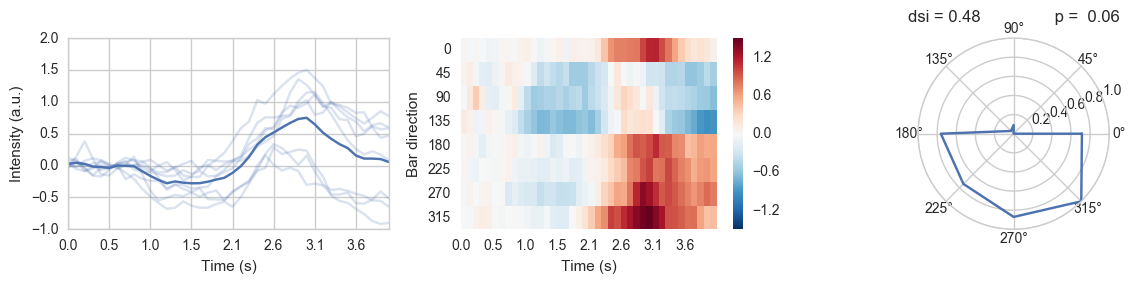

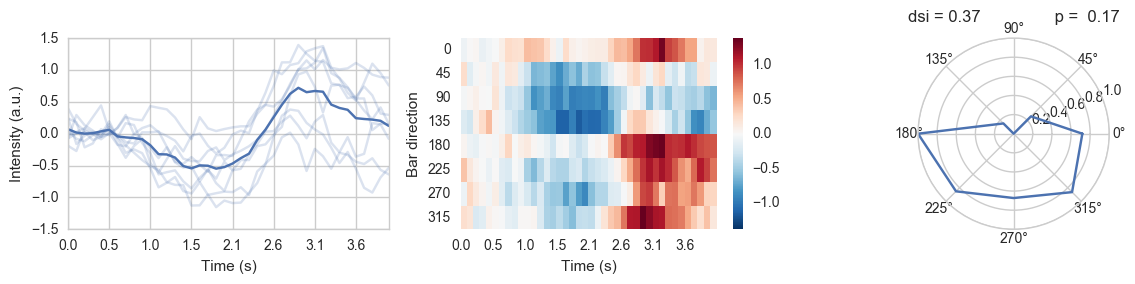

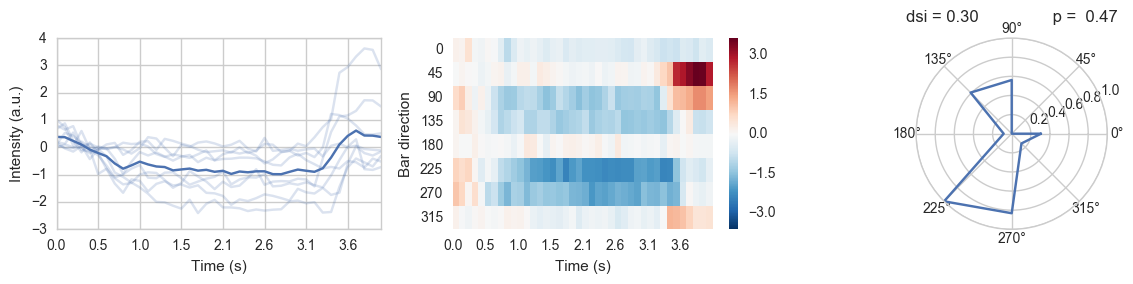

In [232]:
i=0
cellSel = [0, 3]

# Def time vector
time = np.round(np.linspace(p['barTimesStartStop'][0], p['barTimesStartStop'][1], dsCondAvgTraces.shape[1]), 1)

for i in range(cellSel[0], cellSel[1]):
    
    # Call custom plot_ds() function
    fig = plot_ds(avgTraces=data['dsCondAvgTraces'][i],
            time=time,
            dsVector=data['dsVector'][i],
            dsi=data['dsi'][i],
            dsPVal=data['dsPVal'][i],
            )


# # Save figures into one pdf
# # NOTE: As plot_ds outputs a figure object, one cannot simply save multiple figs in one pdf using standard method.
# #       Creating superfigure and placing figs inside does not work either.
# saveDir = "/Users/yannik/Google Drive/lab/BBE_BusseBerensEuler/gcamp6-ogb1/results/figs/getGcamp6Data/ds_activity/unsort"
# import matplotlib.backends.backend_pdf
# pdf = matplotlib.backends.backend_pdf.PdfPages(saveDir+".pdf")
# for fig in range(1, fig.number+1):
#     pdf.savefig(fig)
# pdf.close()    

### Plot sorted roi activity to bar stim

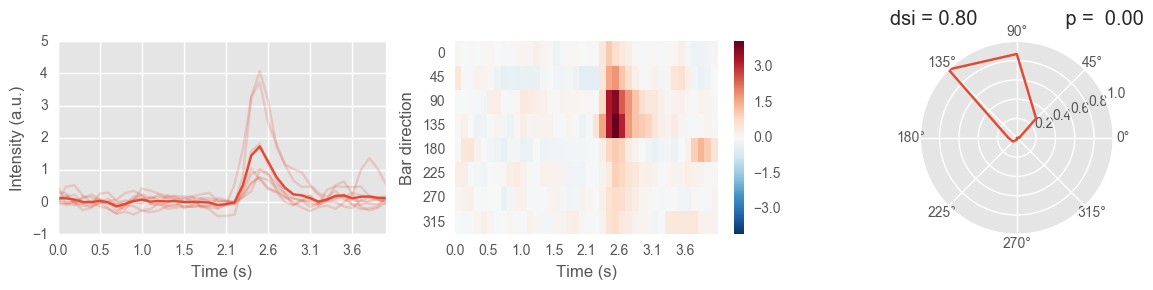

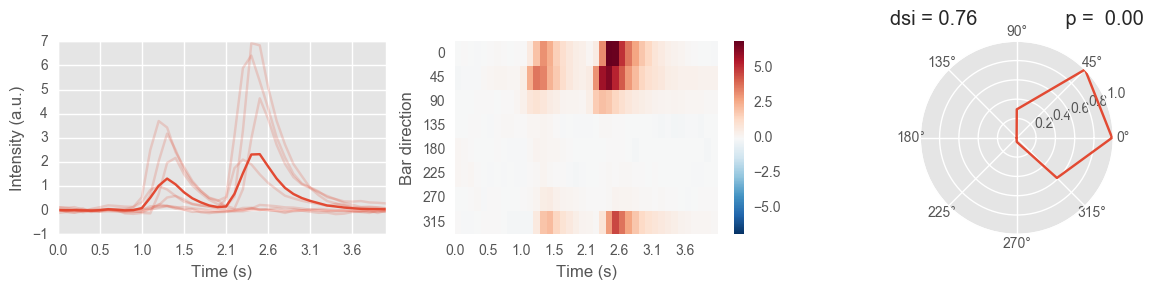

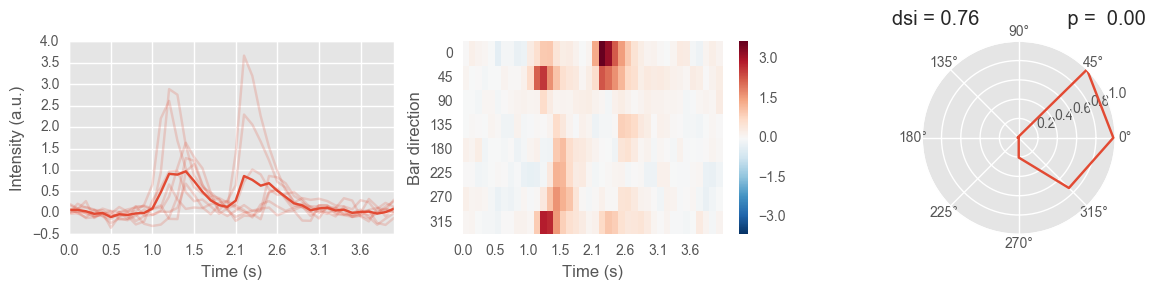

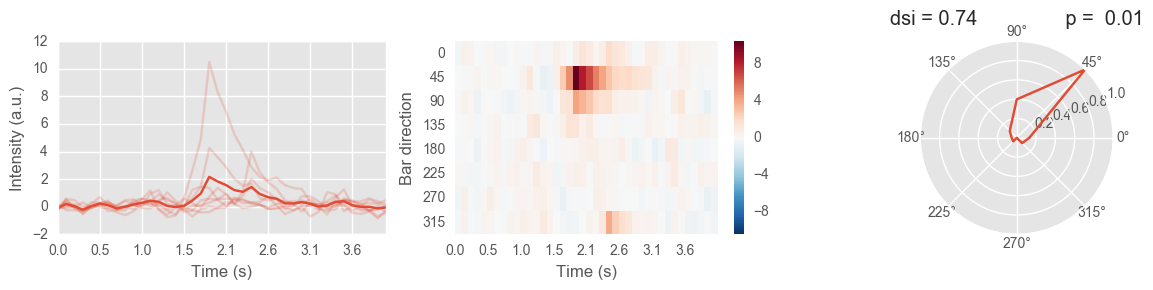

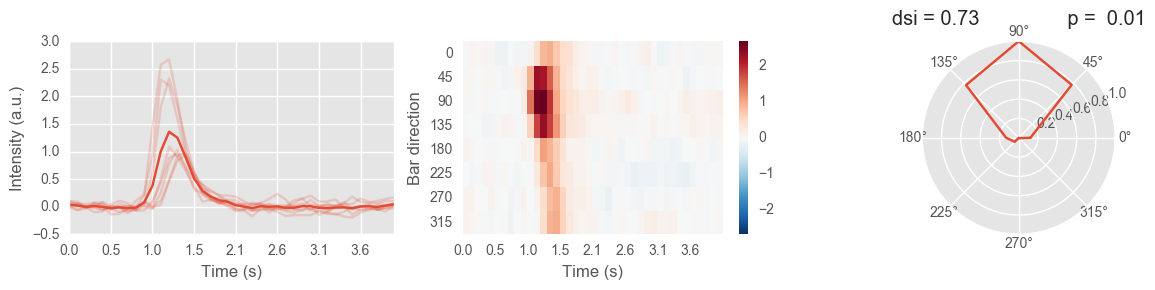

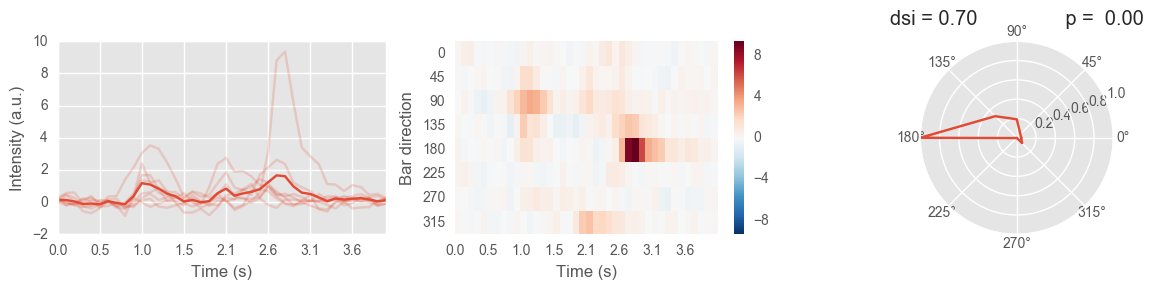

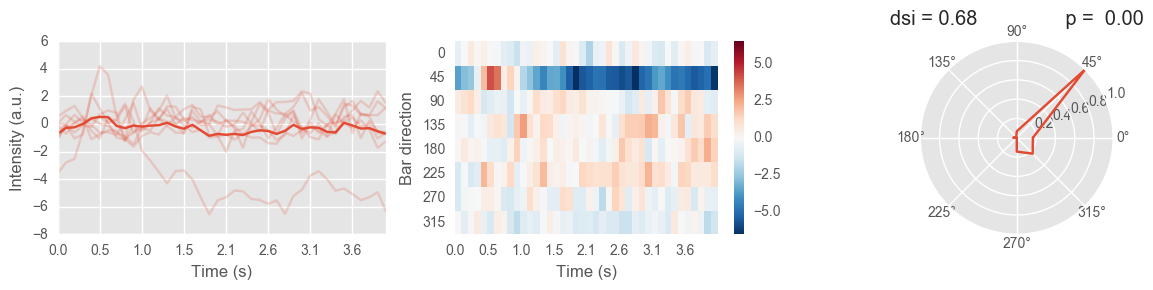

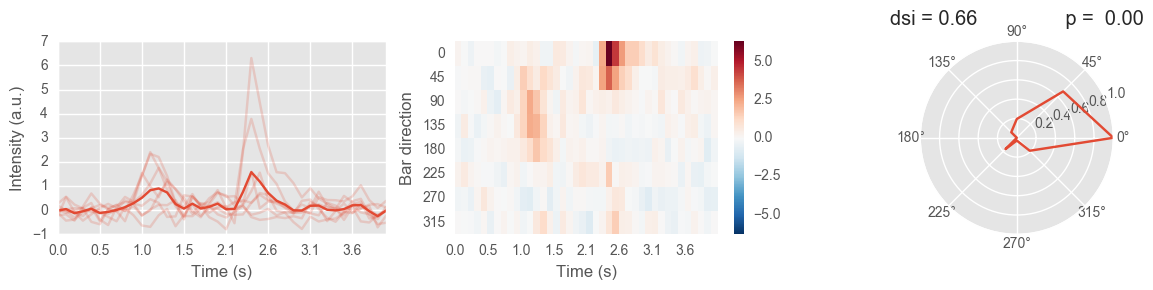

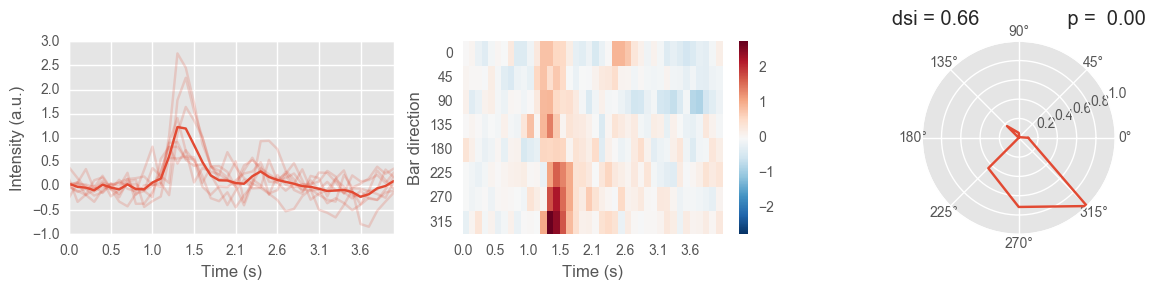

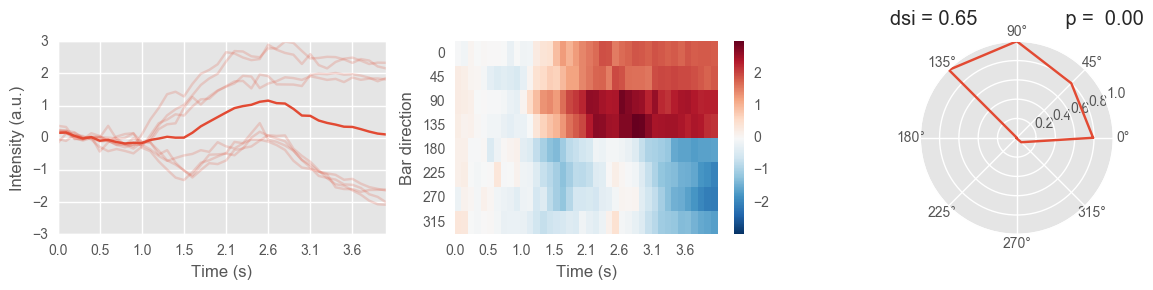

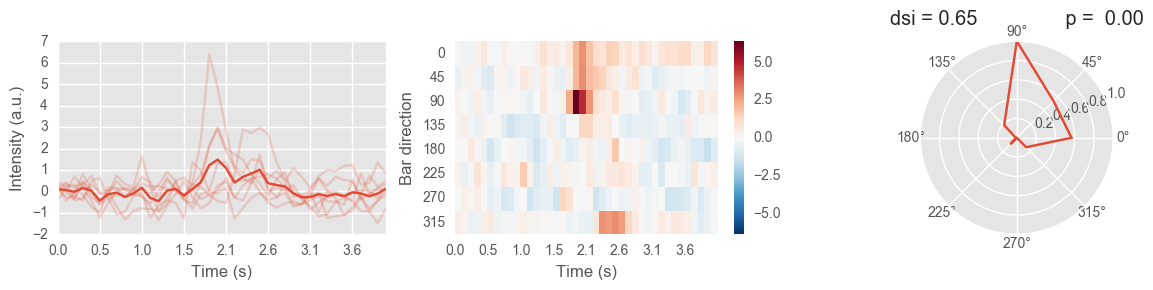

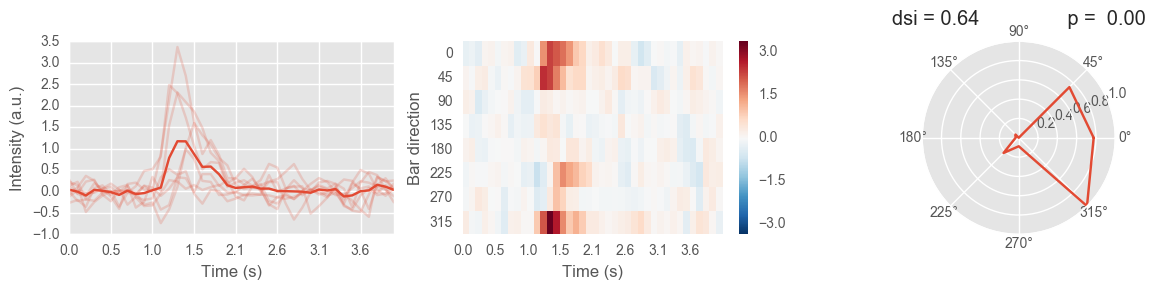

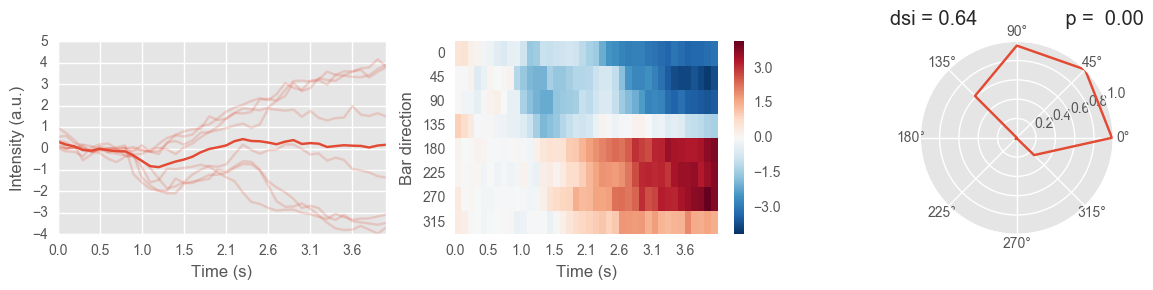

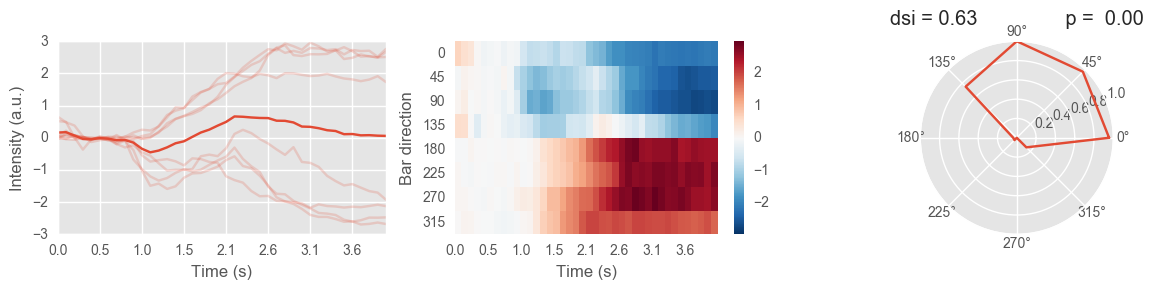

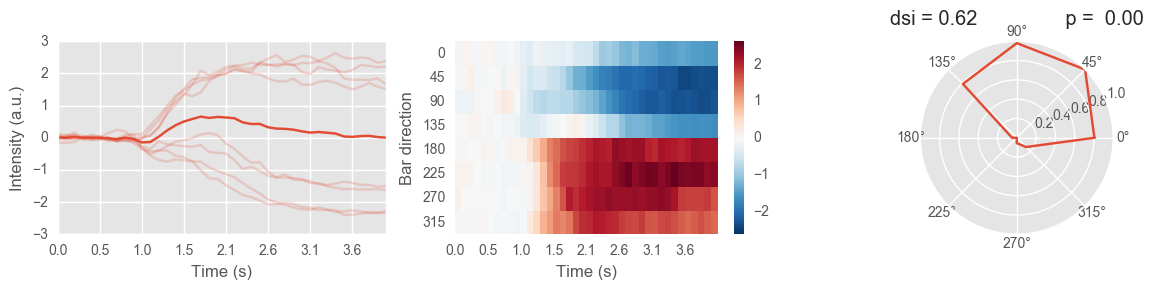

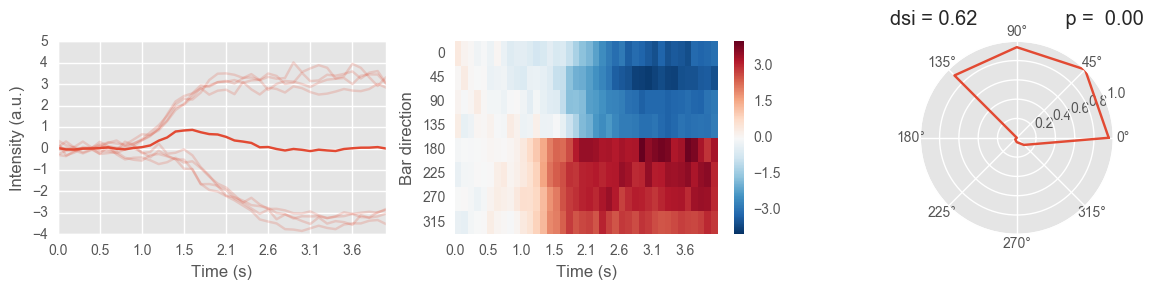

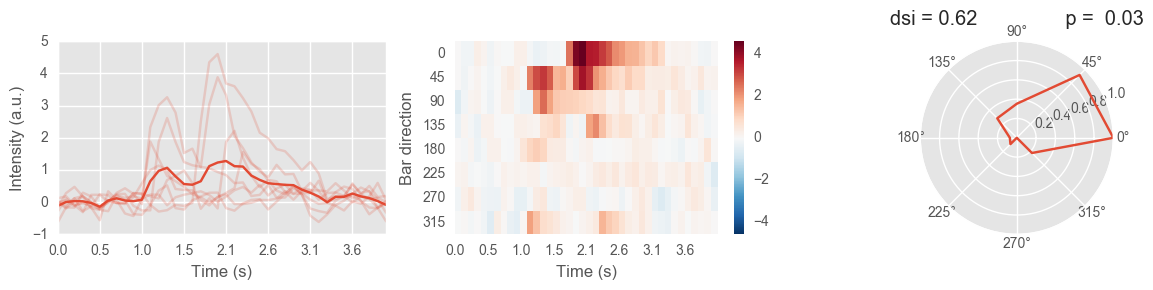

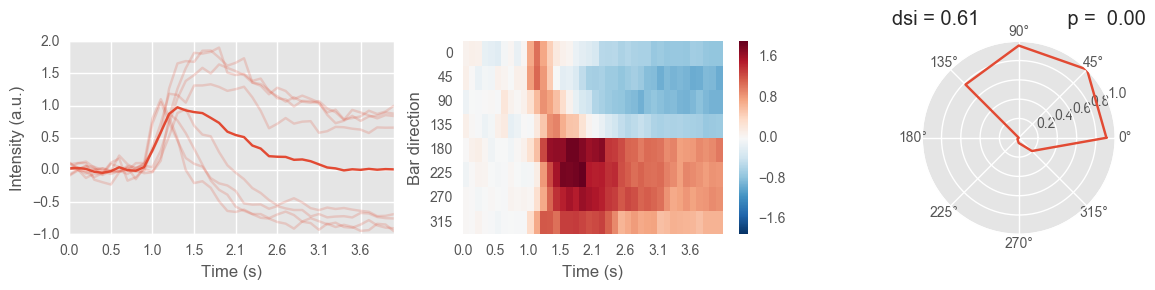

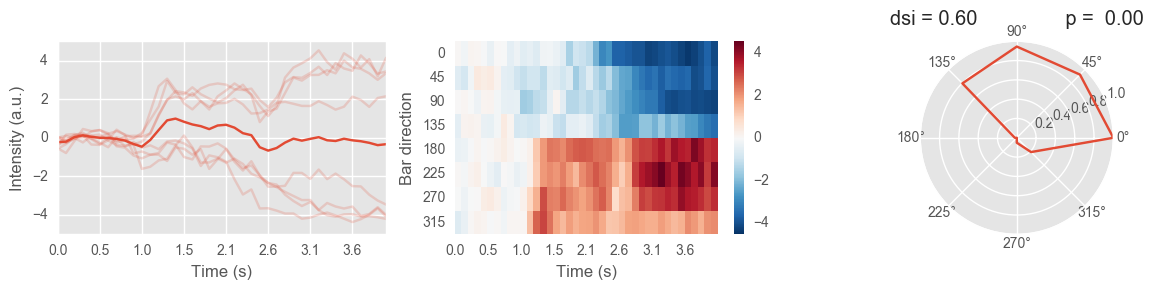

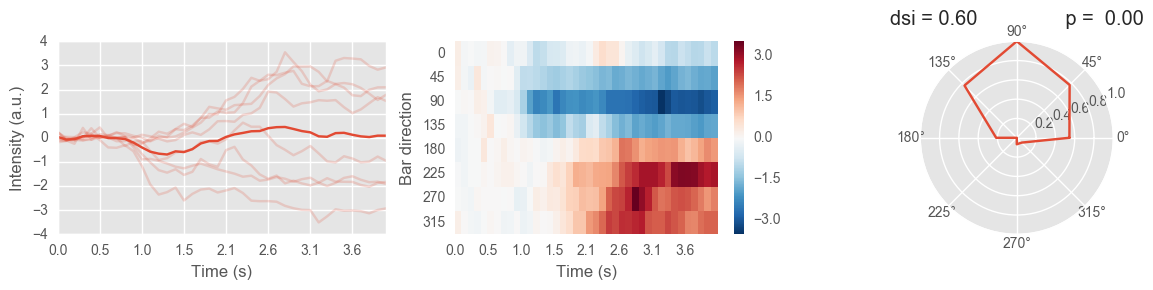

In [228]:
# Params
cellSel = [0, 20]

# Def time vector
time = np.round(np.linspace(p['barTimesStartStop'][0], p['barTimesStartStop'][1], dsCondAvgTraces.shape[1]), 1)

# Subselect ds-cells from data
dataDs = data[data.dsPVal <= 0.05] # Get ds-cells (p-val <= 0.05)
# print(dataDs)

for i in range(cellSel[0], cellSel[1]):
    
    # DSI-sort dataDs and get cell i
    cell = np.array(np.argsort(dataDs['dsi'])[::-1])[i]
    # cell = np.array(np.argsort(data[data.dsPVal <= 0.05]['dsi'])[::-1])#[i] # Alternative one-liner
    
    # Call custom plot_ds() function    
    fig = plot_ds(avgTraces=dataDs.iloc[cell]['dsCondAvgTraces'],
            time=time,
            dsVector=dataDs.iloc[cell]['dsVector'],
            dsi=dataDs.iloc[cell]['dsi'],
            dsPVal=dataDs.iloc[cell]['dsPVal'],
            )

# # Save figures into one pdf
# # NOTE: As plot_ds outputs a figure object, one cannot simply save multiple figs in one pdf using standard method.
# #       Creating superfigure and placing figs inside does not work either.
# saveDir = "/Users/yannik/Google Drive/lab/BBE_BusseBerensEuler/gcamp6-ogb1/results/figs/getGcamp6Data/ds_activity/sort"
# import matplotlib.backends.backend_pdf
# pdf = matplotlib.backends.backend_pdf.PdfPages(saveDir+".pdf")
# for fig in range(1, fig.number+1):
#     pdf.savefig(fig)
# pdf.close()

## Plot traces versus deconvolved traces

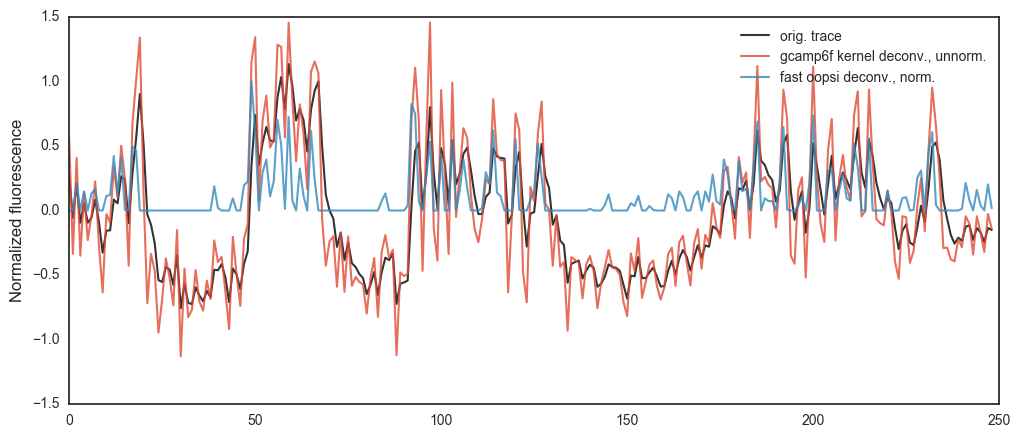

In [59]:
# Get traces
trace = data['chirpTraces'][4].T[:,4]

d, traceSm = pop.deconv(trace, fps=7.825, method='gcamp6fKern', smooth=True, norm=False)
foopsi, traceSm = pop.deconv(trace, fps=7.825, method='foopsi', smooth=True, norm=False)


# Plot pars
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
sns.set_style("white") # Remove background grid (sets for all plots?)
sns.despine(top = True, right = True) # Remove unwanted axis borders
rcParams['svg.fonttype'] = 'none' # Important for rendering text as text in .svg savefig (otherwise path)
rcParams['lines.linewidth'] = 1.5

# Plot
plt.plot(trace, 'k', label='orig. trace', alpha=0.8)
# plt.plot(traceSm)
plt.plot(d, label='gcamp6f kernel deconv., unnorm.', alpha=0.8)
plt.plot(foopsi, label='fast oopsi deconv., norm.', alpha=0.8)

plt.gca().set(ylabel = 'Normalized fluorescence')
plt.legend()



plt.savefig('../../results/figs/deconv/gcamp6f_trace+kern+foopsi.svg', dpi=1200)
